### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [41]:
data = pd.read_csv('data/coupons.csv')

In [43]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [279]:
#Review rows and count
data.info()

# Checking datatype:  All the Columns are with correct data type

# age should be numeric, but Object

data['age'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null  obj

age
21         2642
26         2548
31         2019
50plus     1781
36         1317
41         1089
46          670
below21     544
Name: count, dtype: int64

In [79]:
# Identifying outliers
data.describe()
#data.plot(kind='box', figsize=(15, 5))

# there is no Outliers

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12610.000000,12610.000000,12610.0,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,63.267248,0.414512,1.0,0.559794,0.116019,0.215543,0.784457,0.567565
std,19.153386,0.492657,0.0,0.496432,0.320260,0.411215,0.411215,0.495434
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


2. Investigate the dataset for missing or problematic data.

In [126]:
data.describe(include = "object")

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,12610,108,12503,12393,12460,12481,12421
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1
freq,6266,7248,10011,3220,3989,7031,6469,2642,5068,4325,1861,2006,22,5178,3362,4645,5356,6041


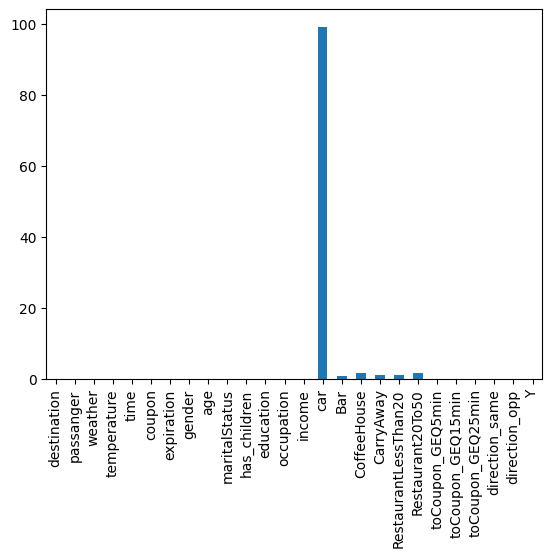

In [108]:
# Missing Rows and Count
(data.isna().mean() * 100).round(2).plot(kind = "bar");

# Validating Car Column : Should be ignored
    # missing 99.15 %
    # df1[['car']].value_counts()
    # has only 5 different values, and doesn't seem important can be ignored


3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
#Checking Duplicates
data.duplicated().sum()

# 74 duplicates removed

# Need to drop duplicates
data = data.drop_duplicates()

4. What proportion of the total observations chose to accept the coupon?



Text(0, 0.5, 'count')

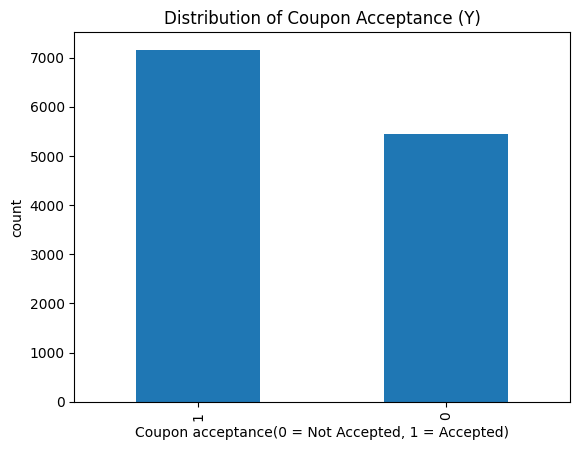

In [127]:
data['Y'].value_counts()
((data['Y'].mean()) * 100).round(2)
# 7157

# Univariate variable analysis :: Coupon acceptance
data['Y'].value_counts().plot(kind='bar', title='Distribution of Coupon Acceptance (Y)')
plt.xlabel('Coupon acceptance(0 = Not Accepted, 1 = Accepted)')
plt.ylabel('count')

# Accept of the coupons 56.76% 

5. Use a bar plot to visualize the `coupon` column.

Text(0, 0.5, 'coupon type')

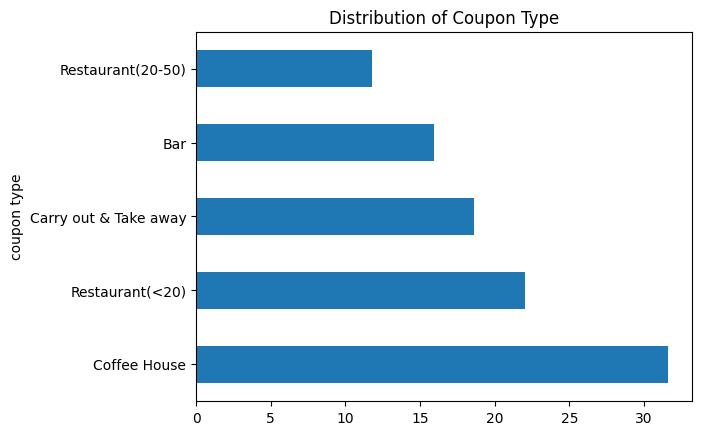

In [327]:
data['coupon'].value_counts(normalize = True).multiply(100).plot(kind='barh', title='Distribution of Coupon Type')
plt.ylabel('coupon type')

# Most used coupon type is : Coffee House
# Least used coupon type is : Restaurant(20-50)

6. Use a histogram to visualize the temperature column.

<Axes: ylabel='Frequency'>

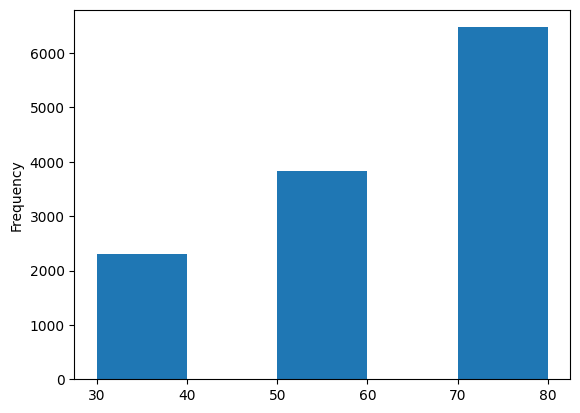

In [107]:
data['temperature'].plot(kind='hist', bins = 5, title='Distribution of Temperature ')

# Survey has more distribution in Summer when the temperature is 70-80, and least distribution on colder days(Winter)


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [143]:
bar_cou_data = data.query('coupon == "Bar"')
bar_cou_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


<Axes: title={'center': 'Proportion of bar coupons were accepted\n 1: Accepted \n0:Not Accepted'}, ylabel='count'>

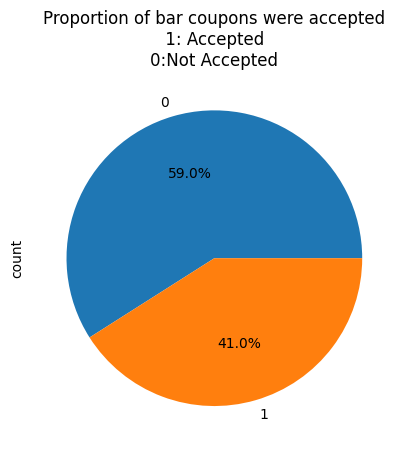

In [141]:
bar_cou_data['Y'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Proportion of bar coupons were accepted\n 1: Accepted \n0:Not Accepted')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Text(0, 0.5, 'number of couponse accepted')

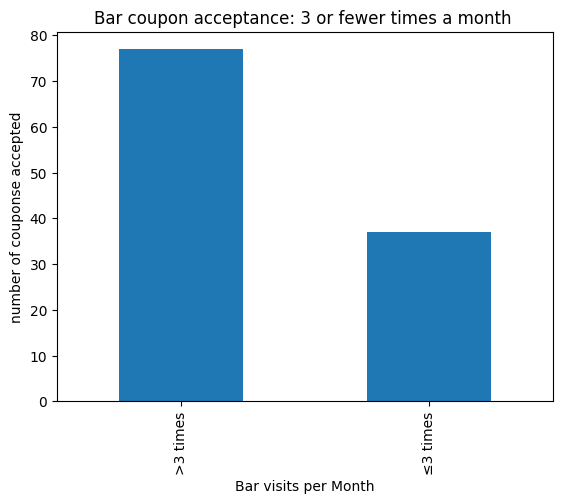

In [162]:
bar_cou_data['Bar'].value_counts()

def fewer_than_3_times(value):
    if pd.isnull(value):
        return None
    if value in ['never', 'less1', '1~3']:
        return '≤3 times'
    else:
        return '>3 times'

bar_cou_data['Bar_group'] = bar_cou_data['Bar'].apply(fewer_than_3_times)    

(bar_cou_data.groupby('Bar_group')['Y'].mean() * 100).round(2).plot(kind='bar', title='Bar coupon acceptance: 3 or fewer times a month ')
plt.xlabel('Bar visits per Month')
plt.ylabel('number of couponse accepted')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [164]:
bar_cou_data['Bar'].value_counts()


Bar
never    830
less1    563
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

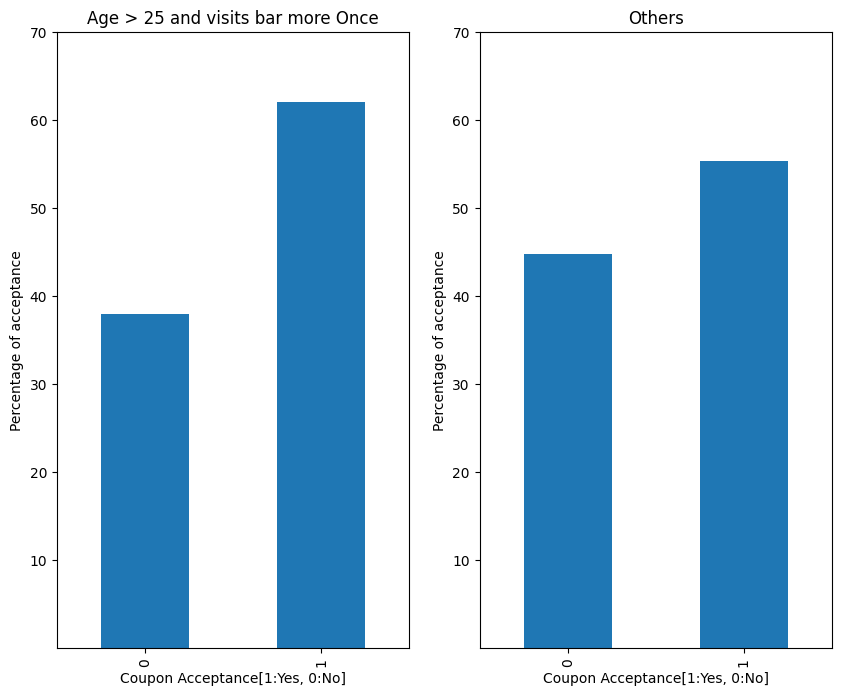

In [233]:
data_bar = data
#.query('coupon == "Bar"')

def visit_condition(value):
    if pd.isnull(value):
        return None
    if value in ['1~3', '4~8', 'gt8']:
        return '>1 times'
    else:
        return '<1 times'

def age_condition(value):
    if '50plus' in value:
        return '>25'
    elif 'below21' in value:
        return '≤ 25'
    int_value = int(value)    
    if int_value > 25:
        return '>25'
    else:
        return '≤ 25'

data_bar['bar_visits']  = data_bar['Bar'].apply(visit_condition) 
data_bar['age_limit']  = data_bar['age'].apply(age_condition) 

data_bar['bar_visits'].value_counts()

data_bar['age_limit'].value_counts()

Group1 = data_bar[(data_bar['bar_visits'] == '>1 times') & (data_bar['age_limit'] == '>25')]
#Others = data_bar[~ ((data_bar['bar_visits'] == '>1 times') & (data_bar['age_limit'] == '>25'))]
Others = data_bar[((data_bar['bar_visits'] != '>1 times') | (data_bar['age_limit'] != '>25'))]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))



plt1 = Group1['Y'].value_counts(normalize=True).sort_index().multiply(100).plot(kind='bar', title='Age > 25 and visits bar more Once', ax=axes[0])
axes[0].set_ylabel('Percentage of acceptance')
axes[0].set_xlabel('Coupon Acceptance[1:Yes, 0:No]')
axes[0].set_yticks([10, 20, 30, 40, 50, 60, 70])

plt2 = Others['Y'].value_counts(normalize=True).sort_index().multiply(100).plot(kind='bar', title='Others', ax=axes[1])
axes[1].set_ylabel('Percentage of acceptance')
axes[1].set_xlabel('Coupon Acceptance[1:Yes, 0:No]')
axes[1].set_yticks([10, 20, 30, 40, 50, 60, 70])

plt.show()

# Drivers who frequent bars more than once a month and are over 25 show a notably higher acceptance rate (about 5% higher) than the rest.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


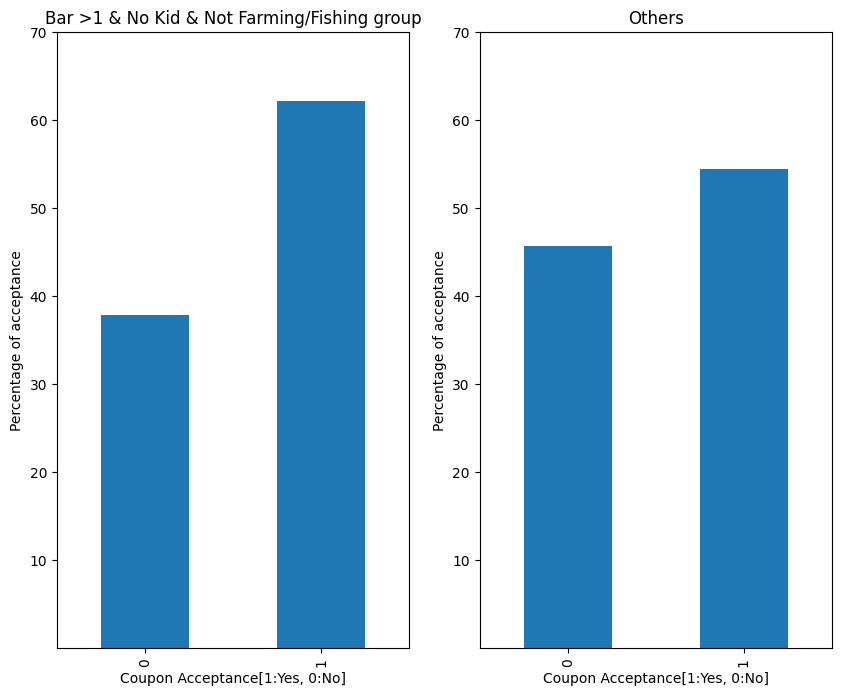

In [272]:
data_bar = data

def visit_condition(value):
    if pd.isnull(value):
        return None
    if value in ['1~3', '4~8', 'gt8']:
        return '>1 times'
    else:
        return '<1 times'

data_bar['bar_visits']  = data_bar['Bar'].apply(visit_condition) 

data['passanger'].value_counts()

excluse_occupation = ['farming', 'fishing','forestry']

group = data_bar[(data_bar['bar_visits'] == '>1 times') & (data_bar['passanger'] != 'kid(s)') & (data_bar['occupation'] != 'Farming & Fishing & Forestry')]
group.sample()

others = data_bar.drop(group.index)

group['Y'].value_counts(normalize=True).sort_index().multiply(100)
others['Y'].value_counts(normalize=True).sort_index().multiply(100)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

plt1 = group['Y'].value_counts(normalize=True).sort_index().multiply(100).plot(kind='bar', title='Bar >1 & No Kid & Not Farming/Fishing group', ax=axes[0])
axes[0].set_ylabel('Percentage of acceptance')
axes[0].set_xlabel('Coupon Acceptance[1:Yes, 0:No]')
axes[0].set_yticks([10, 20, 30, 40, 50, 60, 70])

plt2 = others['Y'].value_counts(normalize=True).sort_index().multiply(100).plot(kind='bar', title='Others', ax=axes[1])
axes[1].set_ylabel('Percentage of acceptance')
axes[1].set_xlabel('Coupon Acceptance[1:Yes, 0:No]')
axes[1].set_yticks([10, 20, 30, 40, 50, 60, 70])

plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



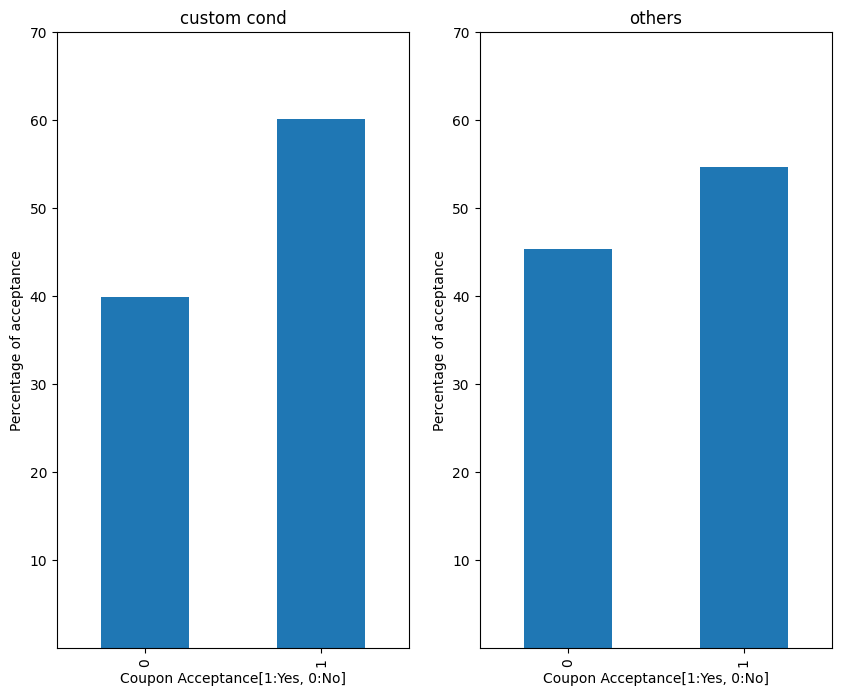

In [283]:
data_bar = data

def visit_condition(value):
    if pd.isnull(value):
        return None
    if value in ['1~3', '4~8', 'gt8']:
        return '>1 times'
    else:
        return '<1 times'

def age_condition(value):
    if '50plus' in value:
        return '>= 30'
    elif 'below21' in value:
        return '< 30'
    int_value = int(value)    
    if int_value > 30:
        return '>= 30'
    else:
        return '< 30' 

data_bar['bar_visits']  = data_bar['Bar'].apply(visit_condition) 
data_bar['age_grp']  = data_bar['age'].apply(age_condition) 

less_than_50k = ['Less than $12500', '$12500 - $24999','$25000 - $37499', '$37500 - $49999']

cond1 = (data_bar['bar_visits'] == '>1 times') & (data_bar['passanger'] != 'kid(s)') & (data_bar['maritalStatus'] != 'widowed')
cond2 = (data_bar['bar_visits'] == '>1 times') & (data_bar['age_grp'] == '< 30')
cond3 = (data_bar['income'].isin(less_than_50k)) & (data_bar['RestaurantLessThan20'] == '4~8')
cond = cond1 | cond2 | cond3

group = data_bar[cond]
others = data_bar.drop(group.index)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

plt1 = group['Y'].value_counts(normalize=True).sort_index().multiply(100).plot(kind='bar', title='custom cond', ax=axes[0])
axes[0].set_ylabel('Percentage of acceptance')
axes[0].set_xlabel('Coupon Acceptance[1:Yes, 0:No]')
axes[0].set_yticks([10, 20, 30, 40, 50, 60, 70])

plt2 = others['Y'].value_counts(normalize=True).sort_index().multiply(100).plot(kind='bar', title='others', ax=axes[1])
axes[1].set_ylabel('Percentage of acceptance')
axes[1].set_xlabel('Coupon Acceptance[1:Yes, 0:No]')
axes[1].set_yticks([10, 20, 30, 40, 50, 60, 70])


plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
1. Driver who visits the bar frequently has the higher acceptance rates(more than 80%)
2. Drivers who are younger (under 30) and also visits bars show higher acceptance rates.
2. Drivers having lower income(< 50k) and visits cheap restaurents show higher acceptance rates.
3. Drivers do not having kids show higher acceptance rates.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [293]:
#data_data.query('coupon == "Bar"')
data.groupby(['temperature','coupon'])[['Y']].value_counts(normalize=True).sort_index().multiply(100)

time  coupon                 Y
10AM  Bar                    0    63.882619
                             1    36.117381
      Carry out & Take away  0    29.902913
                             1    70.097087
      Coffee House           0    35.968820
                             1    64.031180
      Restaurant(20-50)      0    38.392857
                             1    61.607143
      Restaurant(<20)        0    29.042904
                             1    70.957096
10PM  Bar                    0    54.135338
                             1    45.864662
      Carry out & Take away  0    24.183007
                             1    75.816993
      Coffee House           0    57.575758
                             1    42.424242
      Restaurant(20-50)      0    67.105263
                             1    32.894737
      Restaurant(<20)        0    49.568966
                             1    50.431034
2PM   Bar                    0    66.101695
                             1    33.898305
 

Text(0, 0.5, 'count')

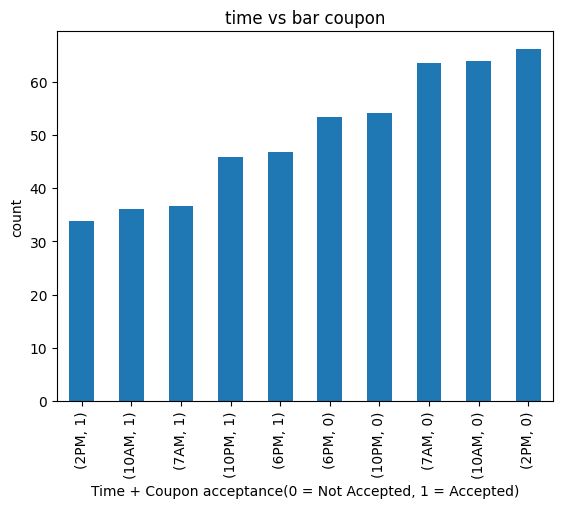

In [316]:
x= data.query('coupon == "Bar"').groupby(['time'])[['Y']].value_counts(normalize=True)
x.sort_values().multiply(100).plot(kind='bar', title = 'time vs bar coupon')
plt.xlabel('Time + Coupon acceptance(0 = Not Accepted, 1 = Accepted)')
plt.ylabel('count')
#

Text(0, 0.5, 'coupon type')

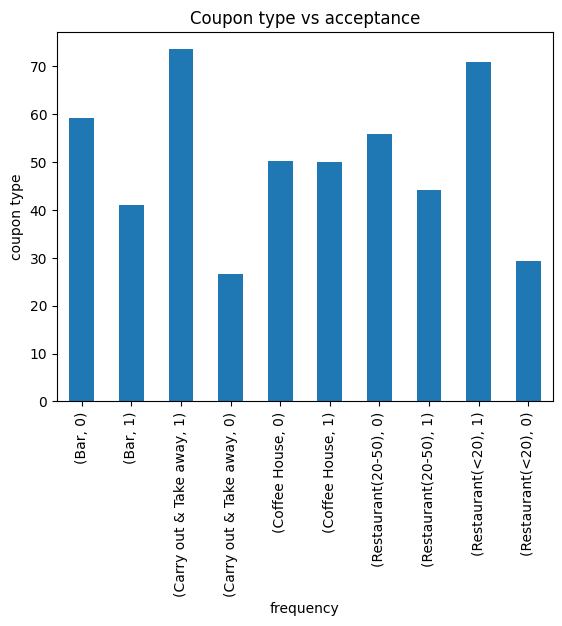

In [328]:
data.groupby(['coupon'])[['Y']].value_counts(normalize=True).multiply(100).plot(kind='bar', title = 'Coupon type vs acceptance')
plt.xlabel('frequency')
plt.ylabel('coupon type')

<Axes: title={'center': 'Distribution of Coupon Type'}, ylabel='coupon'>

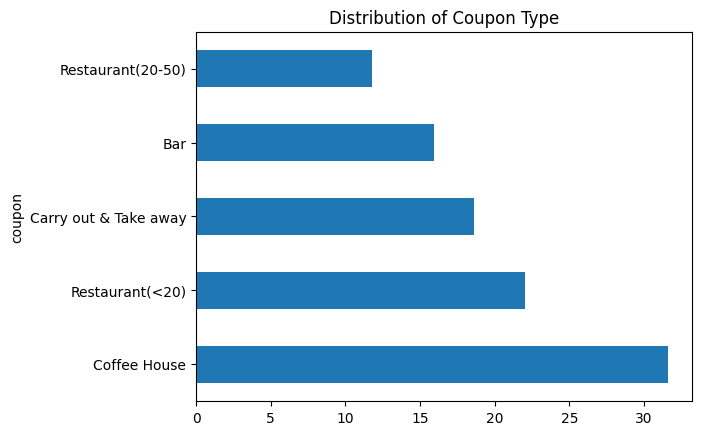

In [326]:
data['coupon'].value_counts(normalize = True).multiply(100).plot(kind='barh', title='Distribution of Coupon Type')
